 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_path, parse_dates=True, infer_datetime_format=True, index_col="Date")
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_returns.shape

(1060, 4)

In [4]:
whale_returns.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [5]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_path = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_path, parse_dates=True, infer_datetime_format=True, index_col="Date")
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
algo_returns.shape

(1241, 2)

In [9]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [11]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_returns_path = Path('Resources/sp500_history.csv')
sp500_returns = pd.read_csv(sp500_returns_path, parse_dates=True, infer_datetime_format=True, index_col="Date")
sp500_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [13]:
sp500_returns["Close"].dtype

dtype('O')

In [14]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns["Close"].str.replace("$","")

sp500_returns.head()

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [16]:
sp500_returns["Close"].dtype

dtype('O')

In [17]:
# convert the type of close data to float
sp500_returns["Close"] = sp500_returns["Close"].astype("float")

In [18]:
# Calculate daily return
sp500_returns["Close"] = sp500_returns["Close"].pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [19]:
# Drop nulls
sp500_returns = sp500_returns.dropna()
sp500_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [20]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close" : "SP500_Daily_returns"})
sp500_returns.head()

,SP500_Daily_returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

In [22]:
daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_Daily_returns            0
dtype: int64

In [23]:
daily_returns.shape

(1042, 7)

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

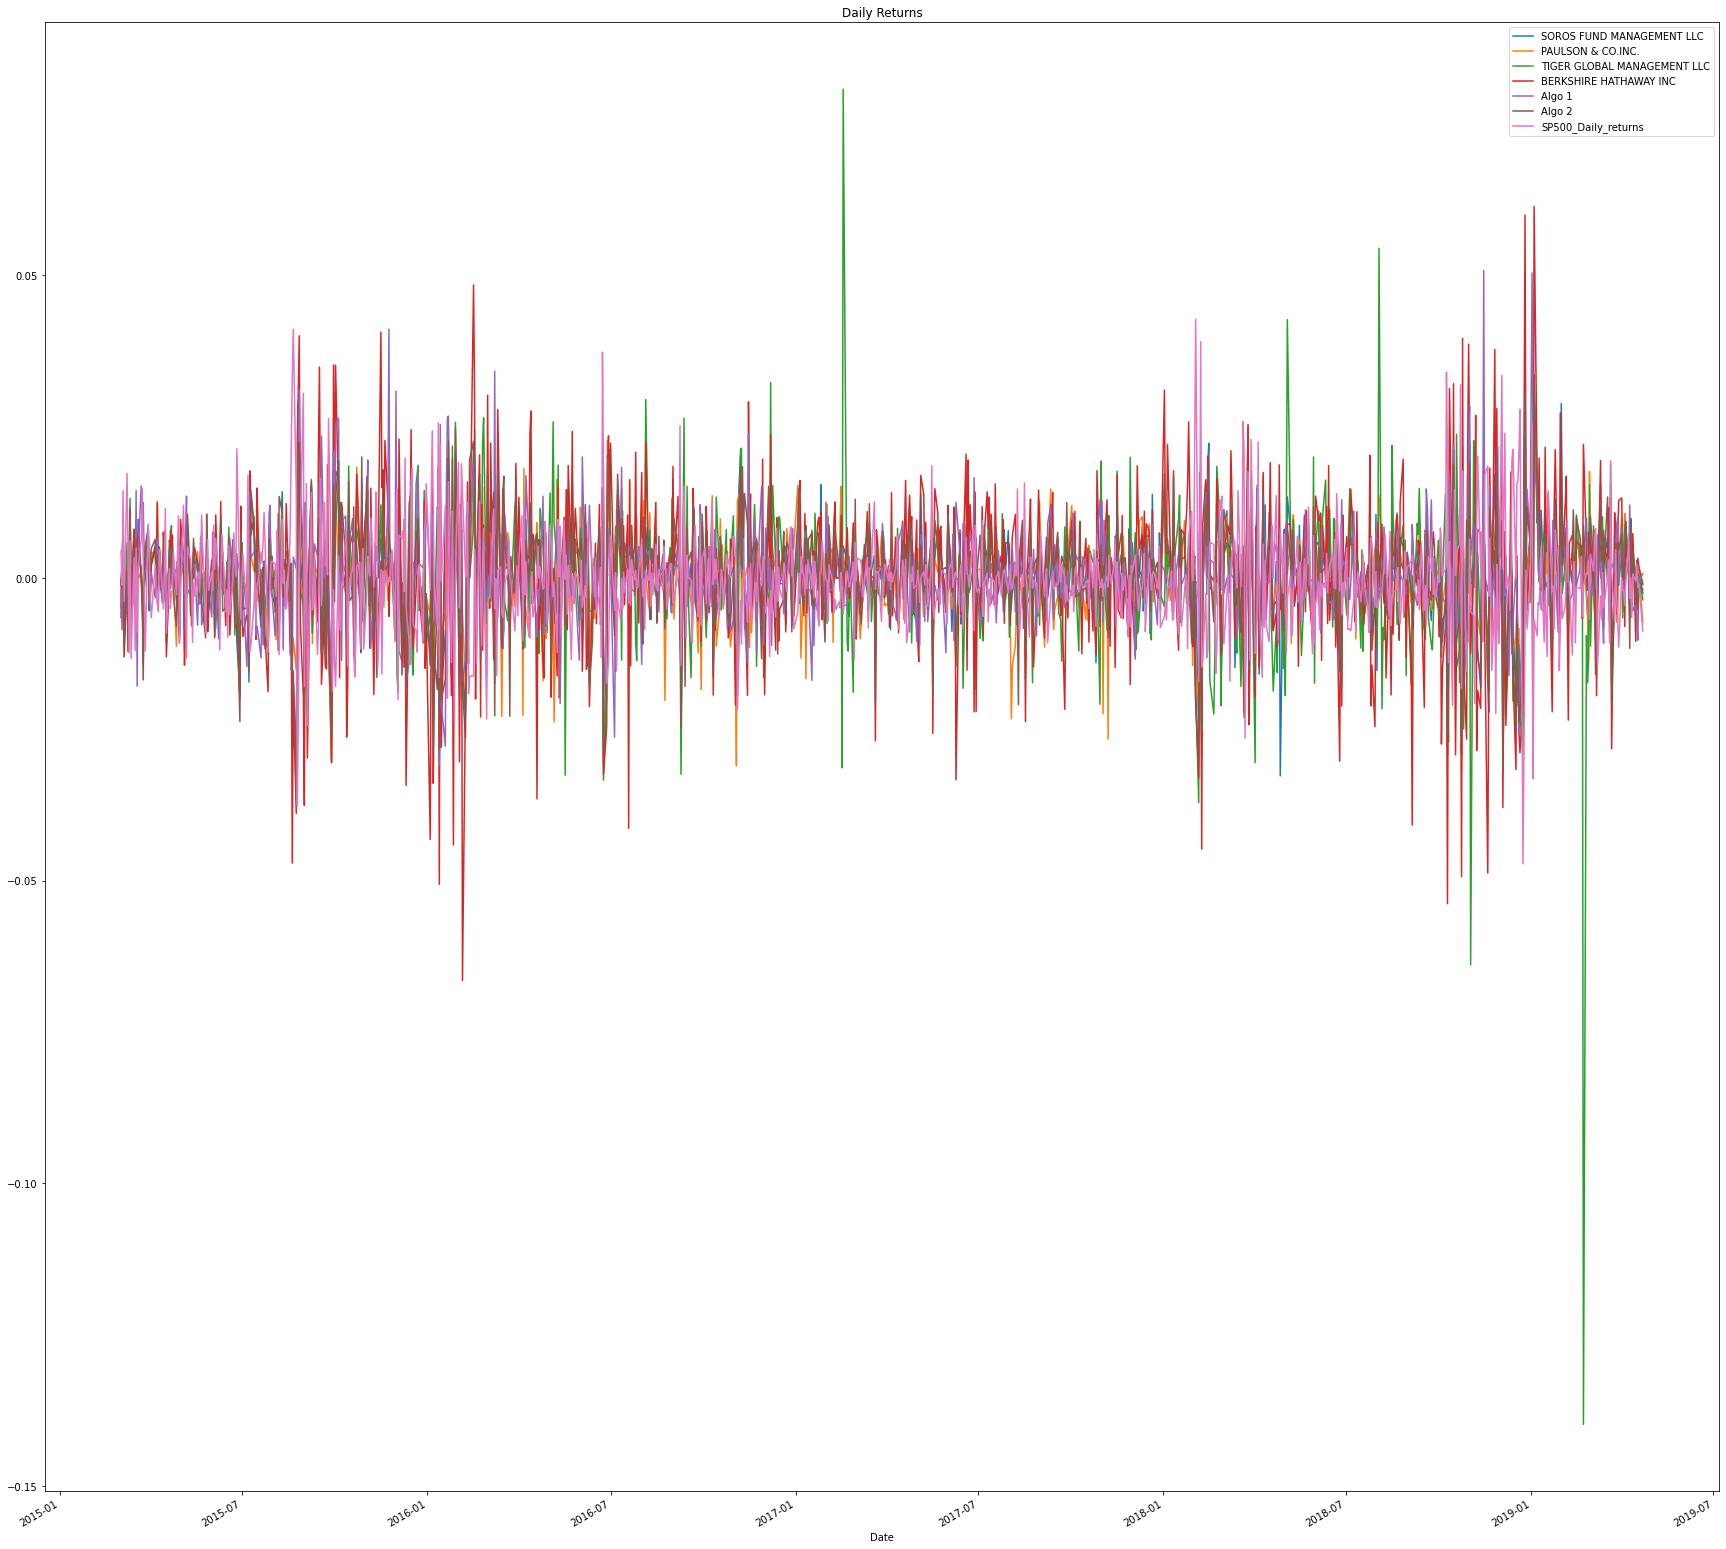

In [24]:
# Plot daily returns of all portfolios
daily_returns.plot(figsize=(30,30), title='Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative daily returns'}, xlabel='Date'>

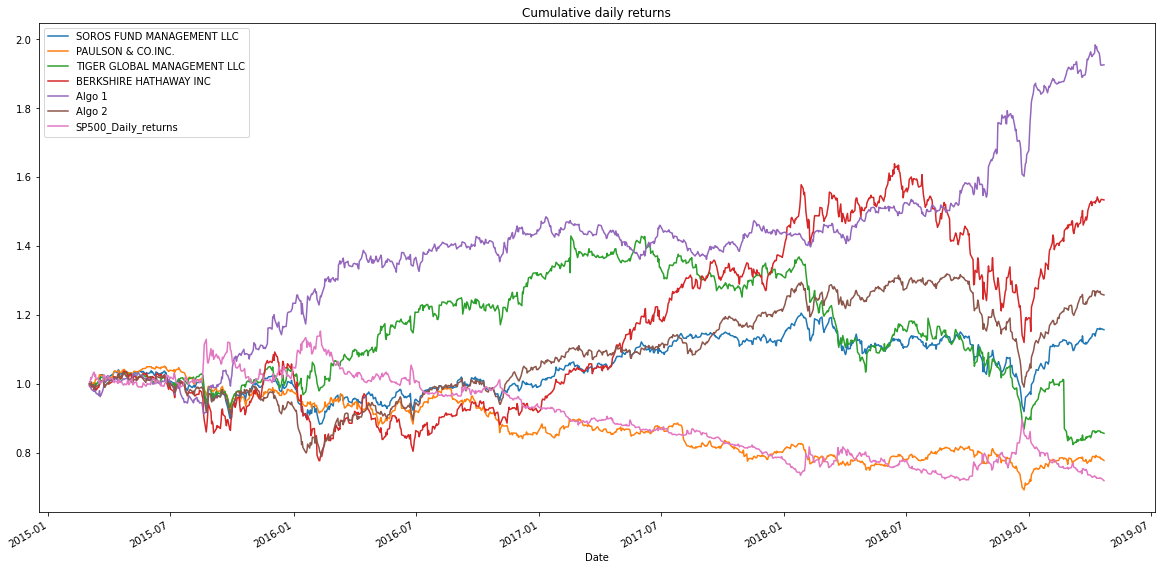

In [25]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title='Cumulative daily returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

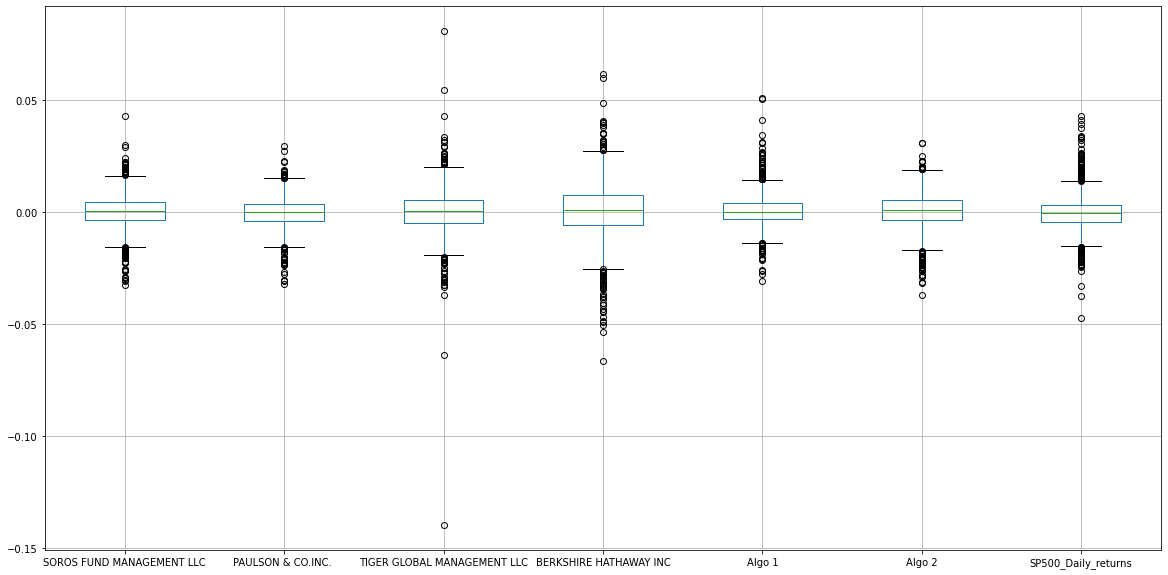

In [26]:
# Box plot to visually show returns
daily_returns.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
all_portfolios_std = daily_returns.std()
all_portfolios_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500_Daily_returns            0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [28]:
# Calculate  the daily standard deviation of S&P 500
SP500_daily_returns_std = all_portfolios_std['SP500_Daily_returns']

# Determine which portfolios are riskier than the S&P 500
print(all_portfolios_std.sort_values())
print("\n")

for key,value in all_portfolios_std.items():
    #print(key, value)
    if value > SP500_daily_returns_std:
        print(key + " is risker than the S&P 500.")

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
SP500_Daily_returns            0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


TIGER GLOBAL MANAGEMENT LLC is risker than the S&P 500.
BERKSHIRE HATHAWAY INC is risker than the S&P 500.


### Calculate the Annualized Standard Deviation

In [29]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_returns.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
SP500_Daily_returns            0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation for all portfolios with 21-day window'}, xlabel='Date'>

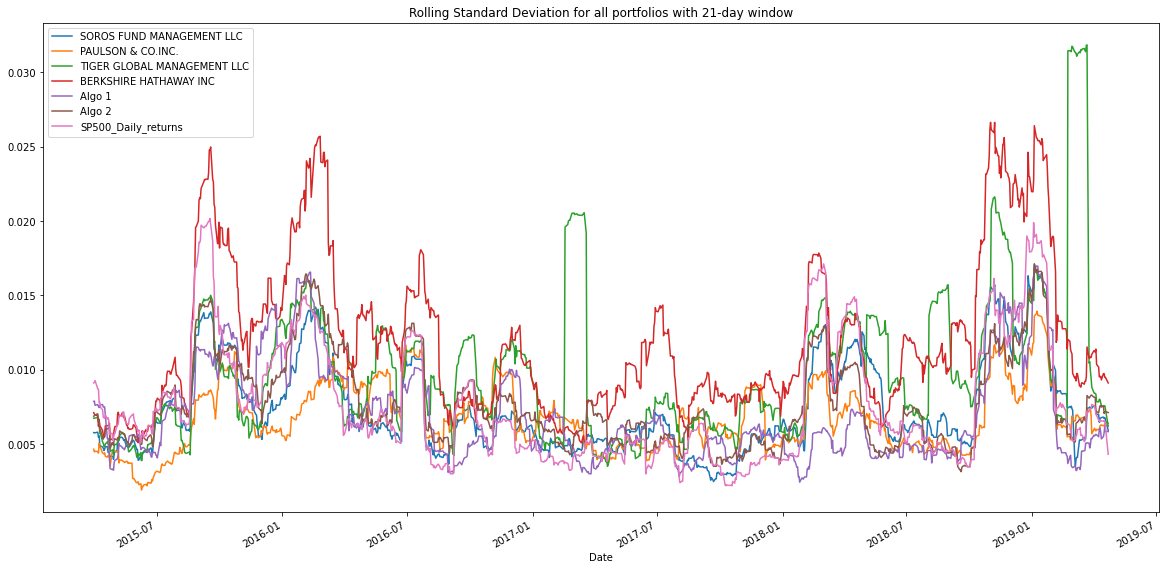

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_all_std = daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_all_std.plot(figsize=(20, 10), title='Rolling Standard Deviation for all portfolios with 21-day window')

### Calculate and plot the correlation

In [31]:
# Calculate the correlation
daily_returns_corr = daily_returns.corr()
daily_returns_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500_Daily_returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

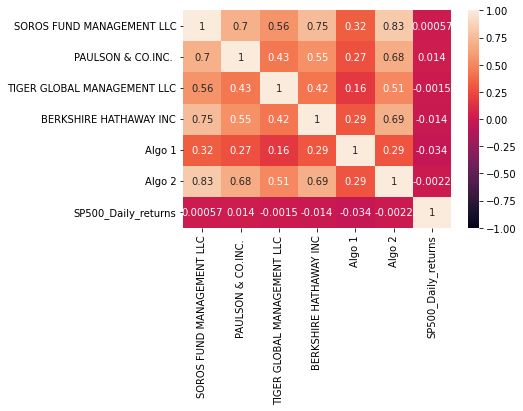

In [32]:
# Display de correlation matrix
sns.heatmap(daily_returns_corr,vmin=-1.00, vmax= 1.00, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

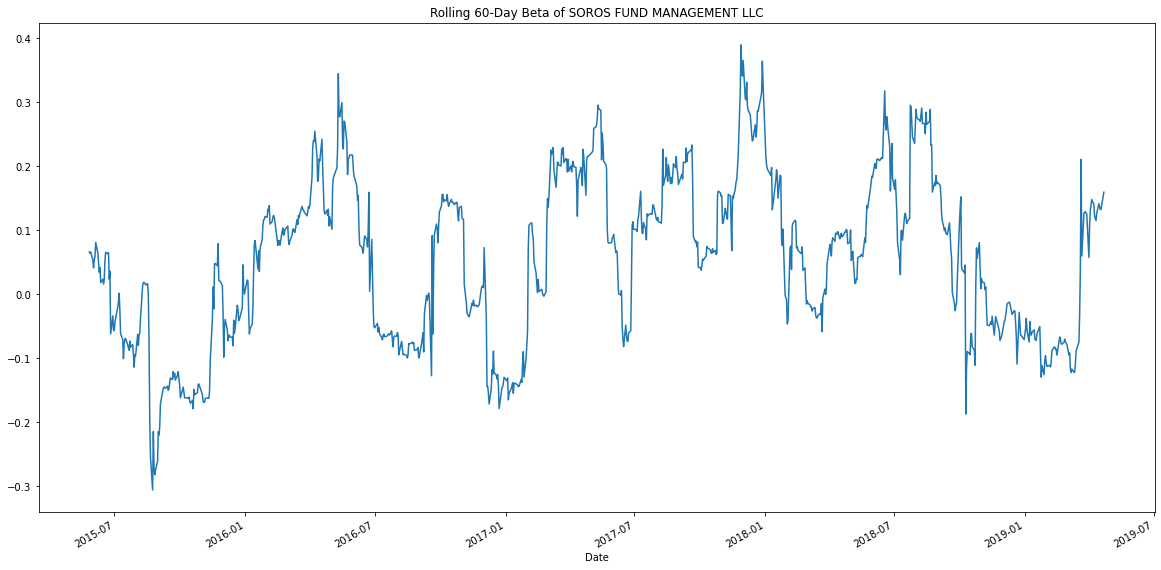

In [33]:
# Calculate covariance of a single portfolio
SOROS_covariance = daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['SP500_Daily_returns'])

# Calculate variance of S&P 500
variance = daily_returns['SP500_Daily_returns'].rolling(window=60).var()

# Computing beta
SOROS_beta = SOROS_covariance / variance

# Plot beta trend
SOROS_beta.plot(figsize=(20, 10),title='Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

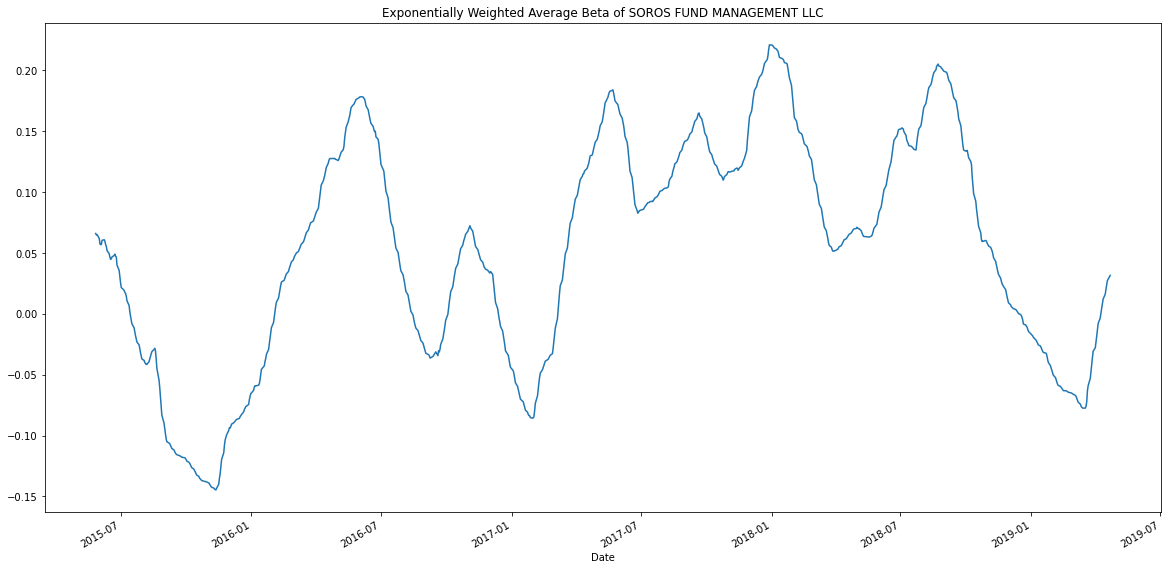

In [34]:
# Use `ewm` to calculate the rolling window
SOROS_beta.ewm(halflife=21).mean().plot(figsize=(20,10),title='Exponentially Weighted Average Beta of SOROS FUND MANAGEMENT LLC')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
sharpe_ratios = ((daily_returns.mean()- 0) * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500_Daily_returns           -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios of all portfolios'}>

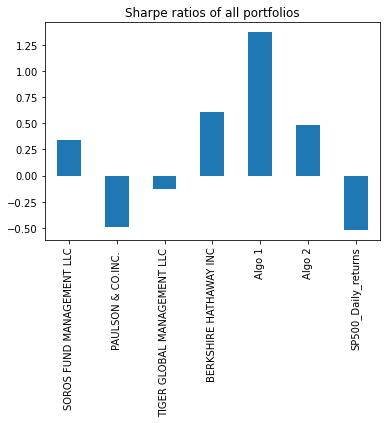

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe ratios of all portfolios')

In [37]:
daily_returns.mean()*252

SOROS FUND MANAGEMENT LLC      0.042981
PAULSON & CO.INC.             -0.054807
TIGER GLOBAL MANAGEMENT LLC   -0.022521
BERKSHIRE HATHAWAY INC         0.124430
Algo 1                         0.165729
Algo 2                         0.064132
SP500_Daily_returns           -0.070689
dtype: float64

In [38]:
daily_returns.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500_Daily_returns            0.136313
dtype: float64

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

If two portfolios offer the same 10% returns, we would take the one that has lower risk because it has a higher sharpe ratio. Accordingly, the algorithmic strategy 1 perfomed better than the algorithmic strategy 2, S&P 500, and other whales portfolios because it had the highest sharpe ratio. On the other hand, the algorithmic strategy 2 had a higher sharpe ratio than S&P 500 and most of whale portfolios. However, its sharpe ratio was lower than algorithmic strategy 1 and BERKSHIRE HATHAWAY INC. Therefore, the algorithmic strategy 1 is the one that we sholud choose.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
# Reading data from 1st stock
Tesla_history_path = Path('Resources/Tesla_history.csv')
Tesla_history = pd.read_csv(Tesla_history_path, parse_dates=True, infer_datetime_format=True, index_col="Date")
Tesla_history = Tesla_history.rename(columns={'Close':'Tesla'})
Tesla_history.head()

,Tesla
Date,
2015-01-02,43.86
2015-01-05,42.02
2015-01-06,42.26
2015-01-07,42.19
2015-01-08,42.12


In [40]:
# Reading data from 2nd stock
Amazon_history_path = Path('Resources/Amazon_history.csv')
Amazon_history = pd.read_csv(Amazon_history_path, parse_dates=True, infer_datetime_format=True, index_col="Date")
Amazon_history = Amazon_history.rename(columns={'Close':'Amazon'})
Amazon_history.head()

,Amazon
Date,
2015-01-02,308.52
2015-01-05,302.19
2015-01-06,295.29
2015-01-07,298.42
2015-01-08,300.46


In [41]:
# Reading data from 3rd stock
Apple_history_path = Path('Resources/Apple_history.csv')
Apple_history = pd.read_csv(Apple_history_path, parse_dates=True, infer_datetime_format=True, index_col="Date")
Apple_history = Apple_history.rename(columns={'Close':'Apple'})
Apple_history.head()

,Apple
Date,
2015-01-02,27.33
2015-01-05,26.56
2015-01-06,26.57
2015-01-07,26.94
2015-01-08,27.97


In [42]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([Tesla_history, Amazon_history, Apple_history], axis='columns', join='inner')
all_stocks.head()

,Tesla,Amazon,Apple
Date,,,
2015-01-02,43.86,308.52,27.33
2015-01-05,42.02,302.19,26.56
2015-01-06,42.26,295.29,26.57
2015-01-07,42.19,298.42,26.94
2015-01-08,42.12,300.46,27.97


In [43]:
# Reset Date index
all_stocks = all_stocks.sort_index()
all_stocks

,Tesla,Amazon,Apple
Date,,,
2015-01-02,43.86,308.52,27.33
2015-01-05,42.02,302.19,26.56
2015-01-06,42.26,295.29,26.57
2015-01-07,42.19,298.42,26.94
2015-01-08,42.12,300.46,27.97
...,...,...,...
2019-12-24,85.05,1789.21,71.07
2019-12-26,86.19,1868.77,72.48
2019-12-27,86.08,1869.80,72.45


In [44]:
# Reorganize portfolio data by having a column per symbol


In [45]:
# Calculate daily returns
my_portfolios_daily_returns = all_stocks.pct_change()
print(my_portfolios_daily_returns.shape)
print(my_portfolios_daily_returns.isnull().sum())

# Drop NAs
my_portfolios_daily_returns = my_portfolios_daily_returns.dropna()
print(my_portfolios_daily_returns.shape)
print(my_portfolios_daily_returns.isnull().sum())

# Display sample data
my_portfolios_daily_returns

(1258, 3)
Tesla     1
Amazon    1
Apple     1
dtype: int64
(1257, 3)
Tesla     0
Amazon    0
Apple     0
dtype: int64


,Tesla,Amazon,Apple
Date,,,
2015-01-05,-0.041952,-0.020517,-0.028174
2015-01-06,0.005712,-0.022833,0.000377
2015-01-07,-0.001656,0.010600,0.013925
2015-01-08,-0.001659,0.006836,0.038233
2015-01-09,-0.018756,-0.011749,0.001073
...,...,...,...
2019-12-24,0.014432,-0.002114,0.000986
2019-12-26,0.013404,0.044467,0.019840
2019-12-27,-0.001276,0.000551,-0.000414


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [46]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolios_returns = my_portfolios_daily_returns.dot(weights)
portfolios_returns.columns=['My portfolio']

# Display sample data
portfolios_returns

Date
2015-01-05   -0.030214
2015-01-06   -0.005582
2015-01-07    0.007623
2015-01-08    0.014470
2015-01-09   -0.009811
                ...   
2019-12-24    0.004435
2019-12-26    0.025903
2019-12-27   -0.000380
2019-12-30   -0.014265
2019-12-31    0.005529
Length: 1257, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [47]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns = pd.concat([daily_returns, portfolios_returns], axis='columns', join='inner')
#daily_returns = pd.concat([daily_returns, my_portfolios_daily_returns], axis='columns', join='inner')
daily_returns.columns=['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','SP500_Daily_returns','My portfolio']
daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_returns,My portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.003531
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.001145
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.004114
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.017339
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.005025
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000688
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.011979
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.004249


In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns = daily_returns.dropna()
daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_returns,My portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.003531
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.001145
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.004114
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.017339
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.005025
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000688
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.011979
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.004249


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [49]:
# Calculate the annualized `std`
annualized_std = daily_returns.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
SP500_Daily_returns            0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
My portfolio                   0.252402
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation with 21-day window'}, xlabel='Date'>

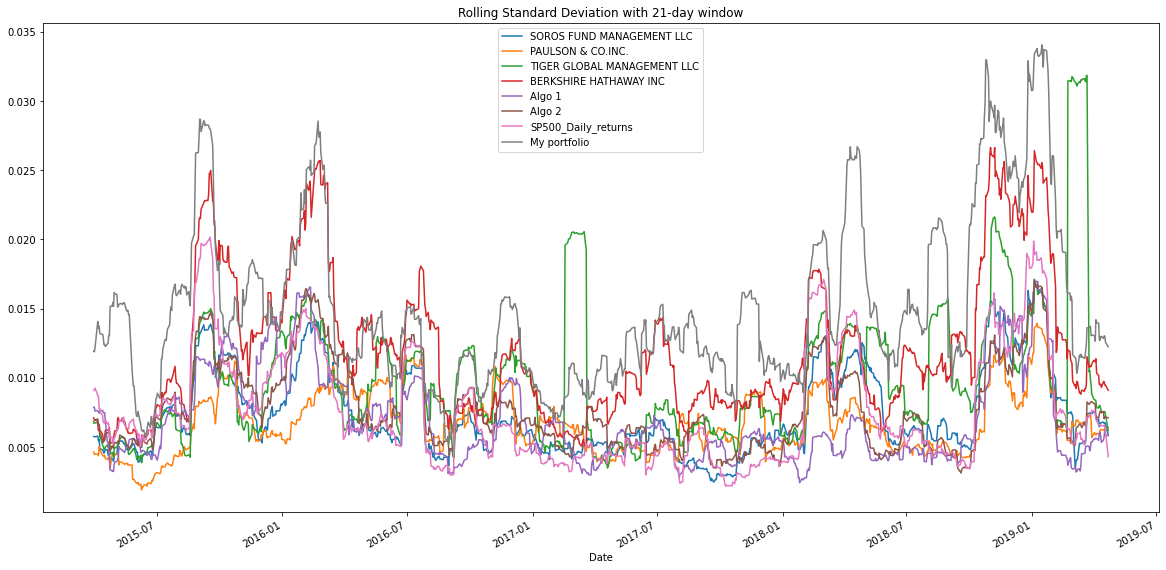

In [50]:
# Calculate rolling standard deviation
rolling_all_std = daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_all_std.plot(figsize=(20, 10), title='Rolling Standard Deviation with 21-day window')

### Calculate and plot the correlation

In [51]:
# Calculate and plot the correlation
daily_returns_corr = daily_returns.corr()
daily_returns_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_returns,My portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.600712
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.449213
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.412664
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.660247
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.237061
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.579010
SP500_Daily_returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,0.039774
My portfolio,0.600712,0.449213,0.412664,0.660247,0.237061,0.579010,0.039774,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}, xlabel='Date'>

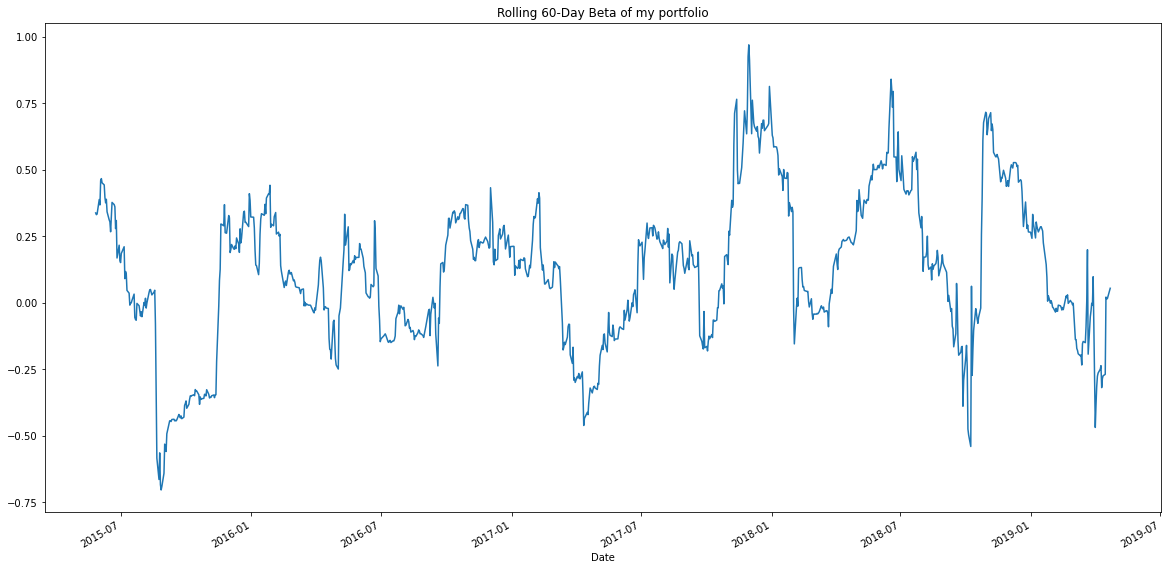

In [52]:
# Calculate and plot Beta
# Calculate covariance of my portfolios
My_portfolio_covariance = daily_returns['My portfolio'].rolling(window=60).cov(daily_returns['SP500_Daily_returns'])

# Calculate variance of S&P 500
variance = daily_returns['SP500_Daily_returns'].rolling(window=60).var()

# Computing beta
My_portfolio_beta = My_portfolio_covariance / variance

# Plot Beta
My_portfolio_beta.plot(figsize=(20, 10),title='Rolling 60-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = ((daily_returns.mean()- 0) * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500_Daily_returns           -0.518582
My portfolio                   0.974592
dtype: float64

<AxesSubplot:>

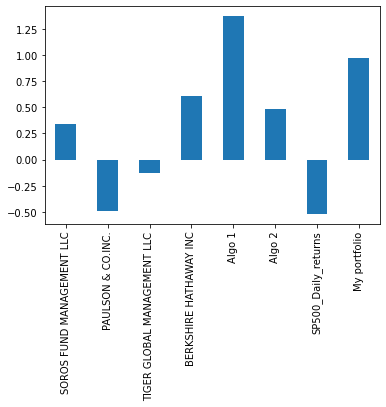

In [54]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

My portfolio had the second highest sharpe ratio. It performed better than S&P 500 and most of whale portfolios. However, the sharpe ratio of my portfolio was lower than of algorithmic strategy 1. The algorithmic strategy 1 was still the one that had the best performance in this portfolio group.